## HW 3 - João Lazzaro

In this code, I compute a version of the HW 3 without the government. It is a simple Ayiagari with endogenous labor choice.
First, Define some Parameters:

In [1]:
using  LinearAlgebra, Plots
include("functions.jl") #In the file functions, I defined the functions for VFI and finding the distribution

#Defining Parameters:
β = 0.98 #Discount rate
μ = 1.5  #Elasticity of intertemporal substitution
η = 0.3 #Utility parameter
τy = 0.4 #Income tax
ρ = 0.6 #autocorrelation
σ = 0.3 #Variance
δ = 0.075 #Depreciation rate
θ = 0.3 #Capital Share
T=0.1 #Transfers, to be added
Z=16.33#productivity level

b = -0.0   #Debt limit
amax=.3  #capital limit

nE = 5 #Number of states for e
nA = 500 #states for assets

500

Initial Guess for interest and wage:

In [2]:
r = (1/β - 1) * rand() #Guess is lower than 1/β -1 
Kguess = ((r+δ)/(Z*θ))^(1/(θ-1))#K for the nitial guess of r
w=  (1-θ)*Z*Kguess^θ  #Initial wage given r0

62.9211442093885

Get the grid for E and assets. Note that in this code, I only use grids. No interpolation, therefore it is inefficient and slow, but I fully understand what is going on. I'll make it better once I understand the full algorithm.

In [3]:
#Defining grids

pdfE,E = Tauchen(ρ,σ,nE)    #E comes from Tauchen method
A = range(b,stop = amax/3, length = Int64(nA/2)) #Half points will be in the first third of the grid
A  =vcat(A, range(A[end],stop = amax, length = nA-Int64(nA/2)))  #Assets


500-element Array{Float64,1}:
 0.0                  
 0.0004016064257028112
 0.0008032128514056224
 0.0012048192771084336
 0.0016064257028112448
 0.002008032128514056 
 0.0024096385542168672
 0.0028112449799196785
 0.0032128514056224897
 0.003614457831325301 
 0.004016064257028112 
 0.004417670682730923 
 0.0048192771084337345
 ⋮                    
 0.29116465863453816  
 0.2919678714859438   
 0.2927710843373494   
 0.293574297188755    
 0.2943775100401606   
 0.29518072289156627  
 0.2959839357429719   
 0.2967871485943775   
 0.2975903614457831   
 0.29839357429718877  
 0.2991967871485944   
 0.3                  

Get the policy functions and distribution, see the file functions.jl where I defined the ayiagari function:

In [4]:
@time λ,r,w, policy_a, policy_c, policy_l,K,N = ayiagary(A,E,r,w,τy,T,β,η,μ,Z)

Iteration: 1, r is: 0.018491751321919152, w is: 37.49459605527139
Iteration: 2, r is: 0.01944995729361265, w is: 24.906761072914108
Iteration: 3, r is: 0.0199290602794594, w is: 18.703458663054725
Iteration: 4, r is: 0.020168611772382772, w is: 15.664164931980054
Iteration: 5, r is: 0.02028838751884446, w is: 14.137591568557625
Iteration: 6, r is: 0.020348275392075302, w is: 13.27008169140461
Iteration: 7, r is: 0.020378219328690723, w is: 12.697985311189655
Iteration: 8, r is: 0.020393191296998434, w is: 12.278701010089673
Iteration: 9, r is: 0.020400677281152288, w is: 11.954749692806583
Iteration: 10, r is: 0.020404420273229217, w is: 11.698576677475252
Iteration: 11, r is: 0.02040629176926768, w is: 11.493932493281697
Iteration: 12, r is: 0.020407227517286915, w is: 11.329745733004353
Iteration: 13, r is: 0.02040769539129653, w is: 11.19566409593903
Iteration: 14, r is: 0.020407929328301336, w is: 11.085186070206593
Iteration: 15, r is: 0.02040804629680374, w is: 10.993070093420306

([0.0391796 0.00172528 … 0.0 0.0], 0.02040816326530614, 10.507044571327846, [1 1 … 1 88; 1 1 … 1 89; … ; 453 453 … 453 488; 454 454 … 454 489], [0.1 0.1 … 0.1 0.13172; 0.100407 0.100407 … 0.100407 0.131721; … ; 0.140611 0.140611 … 0.140611 0.145951; 0.140621 0.140621 … 0.140621 0.145954], [1.0 1.0 … 1.0 0.821769; 1.0 1.0 … 1.0 0.821778; … ; 1.0 1.0 … 1.0 0.910556; 1.0 1.0 … 1.0 0.910575], 0.05395366369942893, 0.07145906854504545)

The consumption policy function is plotted below:

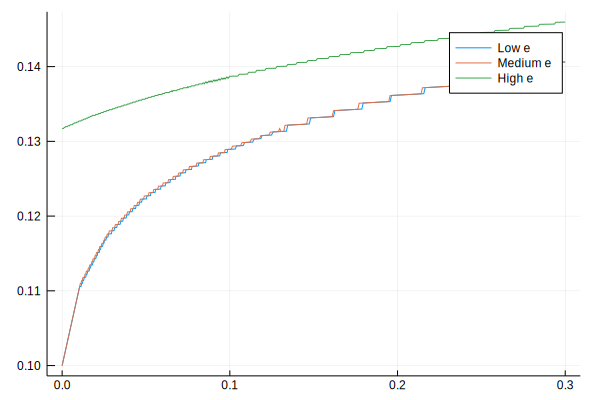

In [5]:
plot(A,[policy_c[:,2] policy_c[:,4] policy_c[:,5]], labels = ["Low e" "Medium e" "High e"])

The assets policy function is plotted below:

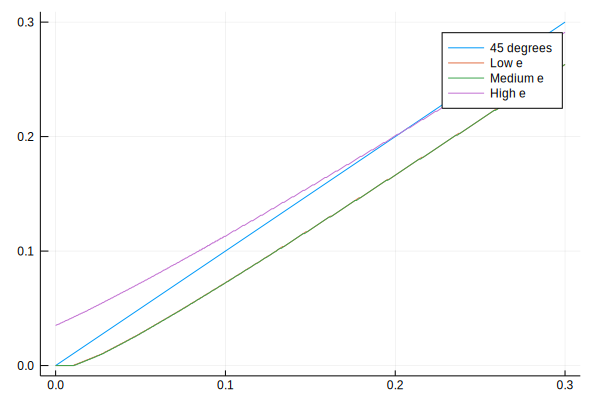

In [6]:
plot(A,[A,A[policy_a[:,2]],A[policy_a[:,4]],A[policy_a[:,5]]], labels = ["45 degrees" "Low e" "Medium e" "High e"])

The assets distribution is below:

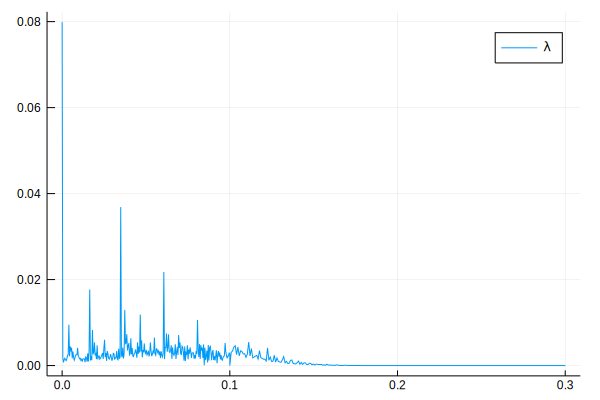

In [7]:
#reshaping λ so it gets in a format easier to plot
λ1 = ones(nA,nE)
i=0
for a=1:nA
    global i
    for e=1:nE
        i+=1
        λ1[a,e] = λ[i]
    end
end

plot(A, sum(λ1,dims=2) , label = "\\lambda")